## **IMPORTING ALL THE REQUIRED LIBRARIES AND MODULES**


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Suppress warning messages
import datetime as dt
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# **IMPORTING DATASET**

In [9]:
stroke_data = pd.read_csv("data.csv")

# **Fill missing values in the 'bmi' column with the median value of that column**

In [10]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].median())

# **Ecoding the Data and Spliting the Data**

In [11]:
# Convert categorical variables into binary columns (one-hot encoding)
# Gender encoding
stroke_data['is_male'] = stroke_data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
stroke_data['is_female'] = stroke_data['gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Marriage status encoding
stroke_data['is_married'] = stroke_data['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

# Work type encoding
stroke_data['work_private'] = stroke_data['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
stroke_data['work_self_employed'] = stroke_data['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)
stroke_data['work_government'] = stroke_data['work_type'].apply(lambda x: 1 if x == 'Govt_job' else 0)
stroke_data['work_child'] = stroke_data['work_type'].apply(lambda x: 1 if x == 'children' else 0)
stroke_data['work_never'] = stroke_data['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)

# Residence type encoding
stroke_data['is_urban'] = stroke_data['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

# Smoking status encoding
stroke_data['smoke_former'] = stroke_data['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
stroke_data['smoke_never'] = stroke_data['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
stroke_data['smoke_current'] = stroke_data['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)
stroke_data['smoke_unknown'] = stroke_data['smoking_status'].apply(lambda x: 1 if x == 'Unknown' else 0)

# Create a copy for modeling and remove original categorical columns
modeling_data = stroke_data.copy()
categorical_columns = ['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married']
modeling_data.drop(categorical_columns, axis=1, inplace=True)

# Prepare features (X) and target variable (y)
features = modeling_data.drop('stroke', axis=1)
target = modeling_data['stroke']

# Split data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# **Initialize and train different regression models**

In [12]:
def train_and_evaluate_model(model, model_name):
    """Helper function to train and evaluate models"""
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    accuracy = model.score(features_test, target_test) * 100
    rmse = np.sqrt(mean_squared_error(target_test, predictions)) * 100
    return accuracy, rmse

# ***Train and Evaluate : ***
* # Linear Regression
* # Lasso Regression
* # Ridge Regression
* # Logistic Regression

In [13]:
# Train and evaluate Linear Regression
standard_model = LinearRegression()
standard_accuracy, standard_rmse = train_and_evaluate_model(standard_model, "Linear Regression")
print(f"Linear Regression Score: {standard_accuracy:.2f}%")
print(f"Linear Regression RMSE: {standard_rmse:.2f}%")

# Train and evaluate Lasso Regression
lasso_model = Lasso()
lasso_accuracy, lasso_rmse = train_and_evaluate_model(lasso_model, "Lasso Regression")
print(f"Lasso Regression Score: {lasso_accuracy:.2f}%")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}%")

# Train and evaluate Ridge Regression
ridge_model = Ridge()
ridge_accuracy, ridge_rmse = train_and_evaluate_model(ridge_model, "Ridge Regression")
print(f"Ridge Regression Score: {ridge_accuracy:.2f}%")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}%")

# Train and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_accuracy, logistic_rmse = train_and_evaluate_model(logistic_model, "Logistic Regression")
print(f"Logistic Regression Score: {logistic_accuracy:.2f}%")
print(f"Logistic Regression RMSE: {logistic_rmse:.2f}%")

Linear Regression Score: 9.49%
Linear Regression RMSE: 22.71%
Lasso Regression Score: 0.94%
Lasso Regression RMSE: 23.76%
Ridge Regression Score: 9.49%
Ridge Regression RMSE: 22.71%
Logistic Regression Score: 93.93%
Logistic Regression RMSE: 24.63%


# **Model Performance Comparision Using " Rador Plot "**

                 Model   Accuracy       RMSE
0    Linear Regression   9.489928  22.710622
1     Lasso Regression   0.942424  23.758795
2     Ridge Regression   9.488956  22.710743
3  Logistic Regression  93.933464  24.630339


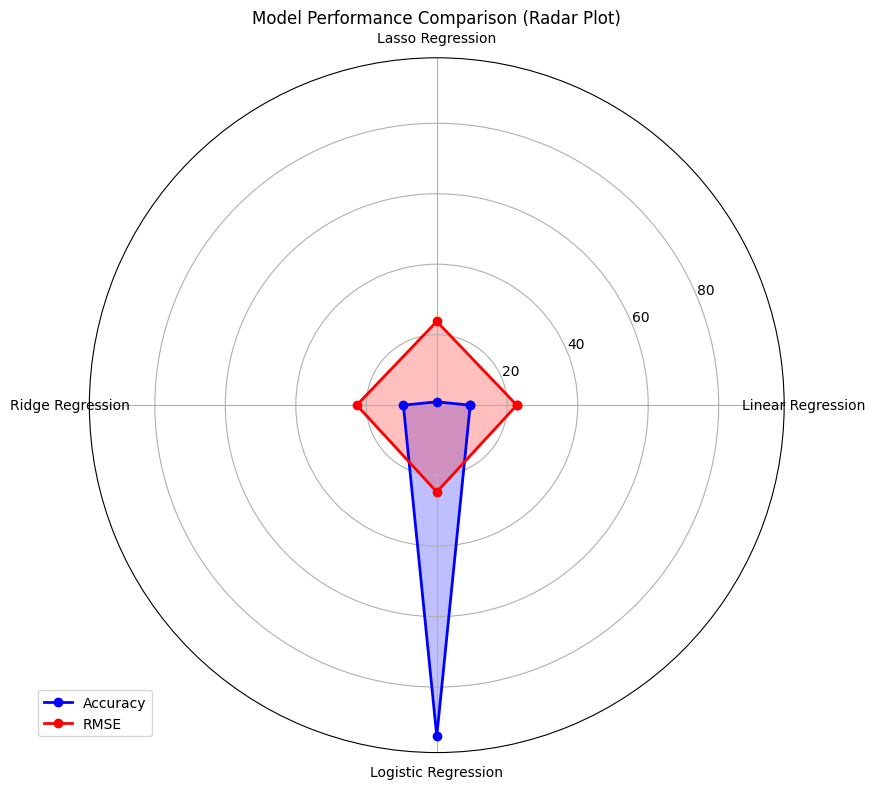

In [14]:
# Create results DataFrame
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression'],
    'Accuracy': [standard_accuracy, lasso_accuracy, ridge_accuracy, logistic_accuracy],
    'RMSE': [standard_rmse, lasso_rmse, ridge_rmse, logistic_rmse]
})
print(model_results)

# Create radar plot for model comparison
plt.figure(figsize=(12, 8))

# Prepare data for radar plot
models = model_results['Model'].tolist()
accuracy_values = model_results['Accuracy'].tolist()
rmse_values = model_results['RMSE'].tolist()

# Number of variables for the radar plot
num_vars = len(models)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

# Initialize the spider plot
ax = plt.subplot(111, polar=True)

# Plot accuracy values
accuracy_values += accuracy_values[:1]
ax.plot(angles, accuracy_values, 'o-', linewidth=2, label='Accuracy', color='blue')
ax.fill(angles, accuracy_values, alpha=0.25, color='blue')

# Plot RMSE values
rmse_values += rmse_values[:1]
ax.plot(angles, rmse_values, 'o-', linewidth=2, label='RMSE', color='red')
ax.fill(angles, rmse_values, alpha=0.25, color='red')

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Model Performance Comparison (Radar Plot)')
plt.tight_layout()
plt.savefig("Model_Performance_Radar.png")
plt.show()